In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
json_file_path = './user_data.json'
with open(json_file_path, 'r', encoding='UTF8') as file:
    user_data = json.load(file)

In [5]:
df_user = pd.DataFrame(user_data)
df_user['gender'] = pd.to_numeric(df_user['gender'], errors='coerce')

user_info = df_user[['age','gender','salary','money']].to_numpy()
user_info = pd.to_numeric(user_info.ravel(), errors='coerce').reshape(user_info.shape)
user_info

array([[        67,          1,  726000000,  126000000],
       [        91,          2, 1459000000,  202000000],
       [        79,          1,  654000000,  727000000],
       ...,
       [        73,          1, 1316000000,  867000000],
       [        79,          2,  138000000,  166000000],
       [         4,          1,  223000000, 1452000000]], dtype=int64)

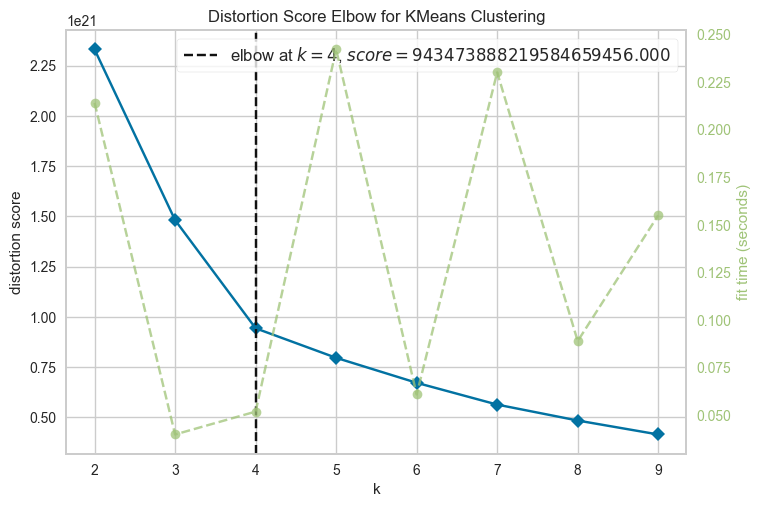

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
X = user_info

km = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)
visualizer.show()

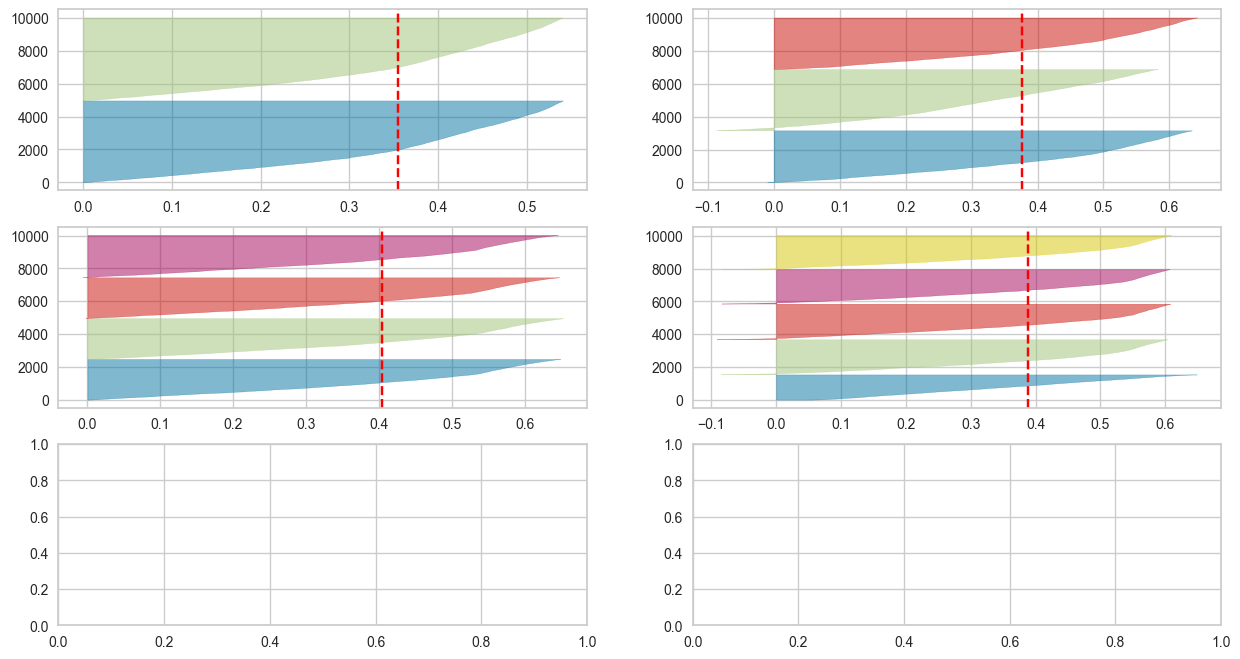

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [9]:
features = ['age', 'gender', 'money', 'salary']

df_user['financial_products'] = df_user['financial_products'].fillna(0)

products = set(','.join(df_user['financial_products']).split(','))
for product in products:
    df_user[product] = df_user['financial_products'].apply(lambda x: 1 if product in str(x) else 0)

# 특성 선택 및 정규화
X = df_user[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 군집화
kmeans = KMeans(n_clusters=4, random_state=42)
df_user['cluster'] = kmeans.fit_predict(X_scaled)

# 결과 출력
print(df_user[['username', 'age', 'money', 'salary', 'cluster']])

     username  age       money      salary  cluster
0       윤서준45   67   126000000   726000000        2
1       정현아97   91   202000000  1459000000        3
2       정서은21   79   727000000   654000000        2
3       윤민우60   28  1160000000    32000000        0
4       강채진93   21   478000000   610000000        2
...       ...  ...         ...         ...      ...
9995    윤현진90   56   322000000  1320000000        2
9996     조민후3   45    40000000  1055000000        3
9997    이민진16   73   867000000  1316000000        0
9998    최하진79   79   166000000   138000000        1
9999    임지우25    4  1452000000   223000000        0

[10000 rows x 5 columns]


c:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
